In [45]:
import rpyc
import matplotlib.pyplot as plt

In [46]:
conn = rpyc.classic.connect(host='172.17.11.98', port=80) # host name or IP address of the EV3

In [62]:
robot = conn.modules.sys
robot.stdout.write("hello world")

11

In [56]:
### This callback is to be placed in the global namespace of the server, so it can return async results to us
#def callback(obj):
#    conn.namespace["storage"] = obj

#conn.namespace["callback"] = callback

conn.execute('''import ev3dev2
from ev3dev2.motor import LargeMotor, MoveSteering, MoveTank, OUTPUT_B, OUTPUT_C
from ev3dev2.sensor.lego import UltrasonicSensor, ColorSensor
from ev3dev2.sensor import INPUT_4, INPUT_1, INPUT_2
from ev3dev2.sound import Sound
from time import sleep
from threading import Thread

motor_queue = []
sensor_queue = []
distance_result = 0
sensor_store = []

###
def sensor_callback(obj):
    sensor_store.append(obj)


# Some basic functions

def move_forward_cm(cm, speed):
    if (len(sensor_store) > 0):
        if (sensor_store[-1] < 20):
            return
        degrees_to_run = cm / 17.5 * 360
        steer_pair = MoveSteering(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
        steer_pair.on_for_degrees(steering=0, speed=speed, degrees=degrees_to_run)
    else:
        print("Unsafe movement, need forward distance")
    
def spin_left_degrees(deg, speed):

    degrees_to_turn = deg * 197.5/90
    steer_pair = MoveSteering(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_degrees(steering=-100, speed=speed, degrees=degrees_to_turn)

def spin_right_degrees(deg, speed):

    degrees_to_turn = deg * 197.5/90
    steer_pair = MoveSteering(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_degrees(steering=+100, speed=speed, degrees=degrees_to_turn)
    
def turn_right_degrees(deg, speed):

    degrees_to_turn = deg * 403/90
    steer_pair = MoveTank(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_degrees(speed, 0, degrees_to_turn)
    
def turn_left_degrees(deg, speed):

    degrees_to_turn = deg * 403/90
    steer_pair = MoveTank(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_degrees(0, speed, degrees_to_turn)
    
def turn_left_rotations(rot, speed):
    steer_pair = MoveTank(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_rotations(0, speed, rot)

def turn_right_rotations(rot, speed):
    steer_pair = MoveTank(OUTPUT_B, OUTPUT_C, motor_class=LargeMotor)
    steer_pair.on_for_rotations(speed, 0, rot)

def getDistanceAhead():
    ultrasound = UltrasonicSensor(INPUT_2)
    return ultrasound.distance_centimeters

def give_motor_command(name, arg):
    if (name == "turn_left_rotations"):
        turn_left_rotations(arg[0], arg[1])
    elif (name == "turn_right_rotations"):
        turn_right_rotations(arg[0], arg[1])
    elif (name =="turn_left_degrees"):
        turn_left_degrees(arg[0], arg[1])
    elif (name =="turn_right_degrees"):
        turn_right_degrees(arg[0], arg[1])
    elif (name =="spin_right_degrees"):
        spin_right_degrees(arg[0], arg[1])
    elif (name =="spin_left_degrees"):
        spin_left_degrees(arg[0], arg[1])
    elif (name =="move_forward_cm"):
        move_forward_cm(arg[0], arg[1])

def give_sensor_command(name, arg):
   if (name == "getDistanceAhead"):
      distance_result = getDistanceAhead()
      sensor_callback(distance_result)

def motor_queue_loop():
   print("Motors On")
   while True:
      sleep(0.5)
      if len(motor_queue) > 0:
          temp = motor_queue.pop(0)
          give_motor_command(temp[0], temp[1])
      elif thread_off == True:
          print("Motors off")
          break;

thread_off = False

motor_thread = Thread(target=motor_queue_loop)
motor_thread.setDaemon(True)
motor_thread.start()

def sensor_queue_loop():
   print("Sensors on")
   while True:
      sleep(0.01)
      if len(sensor_queue) > 0:
          temp = sensor_queue.pop(0)
          give_sensor_command(temp[0], temp[1])
      elif thread_off == True:
          print("Sensors off")
          break;


sensor_thread = Thread(target=sensor_queue_loop)
sensor_thread.setDaemon(True)
sensor_thread.start()


print(motor_queue)''')
print("complete")

complete


In [38]:
conn.execute('''motor_queue = [["move_forward_cm", [5, 50]]]''')

In [60]:
conn.execute('''thread_off = True''')

In [28]:
conn.execute('''sound = Sound()
sound.speak('GFenix rises again')''')

In [58]:
from time import sleep

for x in range(0,60):
    conn.execute('''motor_queue.append(["move_forward_cm", [10, 20]])''')
for x in range(0,200):
    sleep(0.1)
    conn.execute('''sensor_queue.append(["getDistanceAhead", ""])''')


In [59]:
conn.namespace["sensor_store"]

[134.4,
 134.4,
 134.4,
 134.70000000000002,
 134.4,
 134.4,
 132.5,
 130.8,
 129.9,
 129.0,
 125.9,
 124.60000000000001,
 124.4,
 122.7,
 120.4,
 116.4,
 114.80000000000001,
 114.80000000000001,
 114.80000000000001,
 111.9,
 108.5,
 107.0,
 105.2,
 105.2,
 104.2,
 100.60000000000001,
 97.7,
 96.80000000000001,
 96.80000000000001,
 96.80000000000001,
 93.30000000000001,
 91.5,
 90.2,
 88.60000000000001,
 88.60000000000001,
 88.5,
 86.9,
 84.80000000000001,
 81.0,
 80.4,
 80.4,
 80.4,
 77.4,
 75.8,
 75.60000000000001,
 76.2,
 76.2,
 76.60000000000001,
 76.5,
 101.60000000000001,
 97.60000000000001,
 97.0,
 96.30000000000001,
 96.30000000000001,
 78.80000000000001,
 79.2,
 76.5,
 77.4,
 77.4,
 76.2,
 76.2,
 87.30000000000001,
 86.4,
 85.9,
 85.5,
 85.30000000000001,
 83.10000000000001,
 82.30000000000001,
 79.60000000000001,
 80.4,
 79.2,
 78.2,
 78.4,
 75.60000000000001,
 76.60000000000001,
 75.60000000000001,
 75.0,
 75.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,
 255.0,

In [ ]:
conn.execute('''sensor_queue = [["getDistanceAhead", []]]''')
conn.namespace["distance_result"]

In [ ]:
conn.execute('''
lightsensor = ColorSensor(INPUT_1)
for x in range(1,30):
    print(lightsensor.reflected_light_intensity)
    sleep(1)''')

In [ ]:
conn.execute('''tank_drive = MoveTank(OUTPUT_B, OUTPUT_C)
# drive in a turn for 10 rotations of the outer motor
tank_drive.on_for_degrees(-10, 0, 403)''')

In [ ]:
conn.execute('''turn_left_degrees(90,10)
turn_right_degrees(90,-10)
''')

In [79]:
conn.execute('''
def scan_mode():
    scanResults = []
    for x in range(0,90):
        spin_left_degrees(2,6)
        scanResults.append(((x+1) * 2, getDistanceAhead()))
    return scanResults''')

In [80]:
x = conn.execute('''scanResults = scan_mode()''')

In [57]:
# Pipe the output to jupyter

import sys
conn.modules.sys.stdout = sys.stdout

In [ ]:
conn.execute('''hunting_mode = False''')
print(conn.namespace["hunting_mode"])

In [15]:
conn.execute('''
scan_number = 0
scanResults = {}
degrees = 90
direction = "starboard"
scanResults[scan_number] = []
limit = 60

while(limit > 0):
    limit -= 1
    if (direction == "starboard"):
        turn_left_rotations(5/360,100)
        degrees += 5
    else:
        turn_left_rotations(5/360,-100)
        degrees -= 5
        
    if (degrees == 45):
        direction = "starboard"
    elif (degrees == 135):
        direction = "port"
    
    if (degrees == 90) & (direction == "starboard"):
        scan_number += 1
        scanResults[scan_number] = []
        
    scanResults[scan_number].append((degrees, getDistanceAhead()))
''')

In [16]:
print(conn.namespace["scanResults"])

{0: [(95, 255.0), (100, 255.0), (105, 255.0), (110, 255.0), (115, 34.7), (120, 32.6), (125, 32.1), (130, 32.1), (135, 32.6), (130, 32.1), (125, 32.6), (120, 32.800000000000004), (115, 34.7), (110, 35.5), (105, 255.0), (100, 255.0), (95, 255.0), (90, 255.0), (85, 255.0), (80, 255.0), (75, 255.0), (70, 255.0), (65, 255.0), (60, 255.0), (55, 255.0), (50, 255.0), (45, 255.0), (50, 255.0), (55, 255.0), (60, 255.0), (65, 255.0), (70, 255.0), (75, 255.0), (80, 255.0), (85, 255.0)], 1: [(90, 255.0), (95, 255.0), (100, 255.0), (105, 255.0), (110, 34.7), (115, 32.6), (120, 32.6), (125, 32.1), (130, 32.6), (135, 32.6), (130, 32.6), (125, 32.1), (120, 32.6), (115, 32.9), (110, 35.5), (105, 255.0), (100, 255.0), (95, 255.0), (90, 255.0), (85, 255.0), (80, 255.0), (75, 255.0), (70, 255.0), (65, 255.0), (60, 255.0)]}


TypeError: 'int' object is not iterable

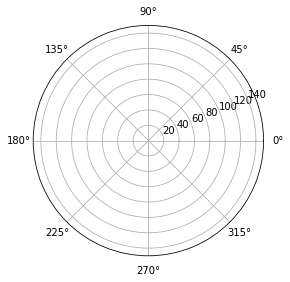

In [8]:


fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_ylim(0,150)
for x, y in conn.namespace["scanResults"]:
    plt.polar(x* 0.0174533, y, 'ro')
    #ax.plot(x,y,lw=1.5)
plt.show()

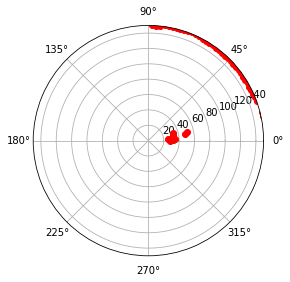

In [34]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_ylim(0,150)
for x, y in conn.namespace["scanResults"][0]:
    plt.polar(x* 0.0174533, y, 'ro')
    #ax.plot(x,y,lw=1.5)
plt.show()

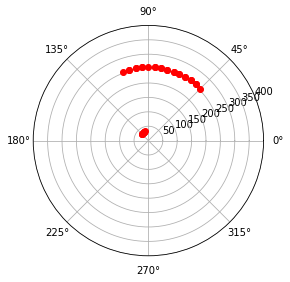

In [20]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_ylim(0,400)
for x, y in conn.namespace["scanResults"][0]:
    plt.polar(x* 0.0174533, y, 'ro')
    #ax.plot(x,y,lw=1.5)
plt.show()